In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
birds = pd.read_csv('birds.csv')
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


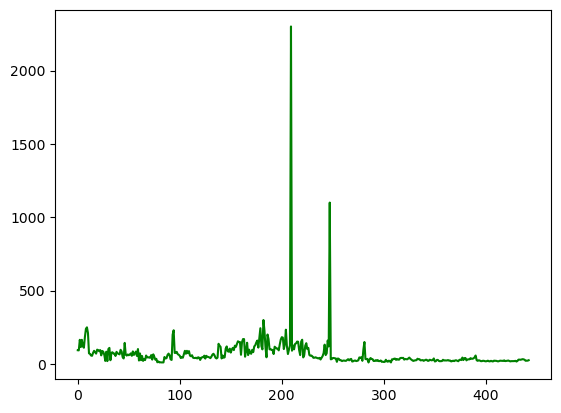

In [3]:
maxwingspan = birds['MaxWingspan']
maxwingspan.plot(color='green')
plt.show()

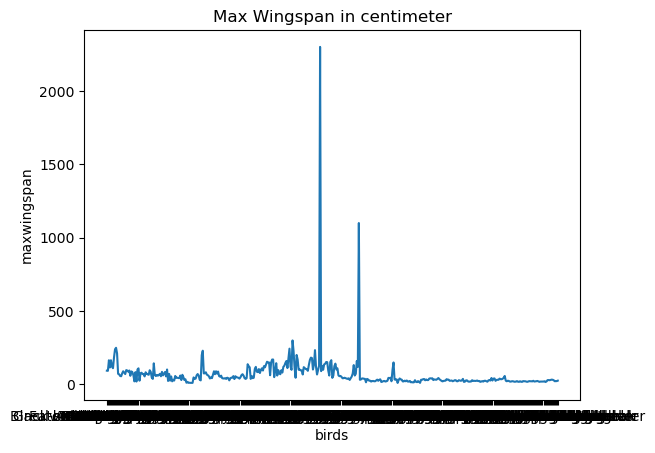

In [4]:
y = maxwingspan
x = birds['Name']
plt.xlabel('birds')
plt.ylabel('maxwingspan')
plt.title('Max Wingspan in centimeter')
plt.plot(x, y)
plt.show()

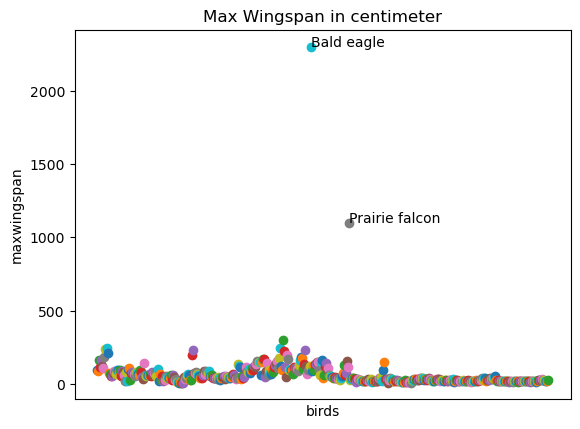

In [5]:
plt.tick_params(labelbottom=False,bottom=False)
plt.xlabel('birds')
plt.ylabel('maxwingspan')
plt.title('Max Wingspan in centimeter')
for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    plt.scatter(x, y)

    if birds['MaxWingspan'][i] > 500:
        plt.text(x, y, birds['Name'][i])
plt.show()

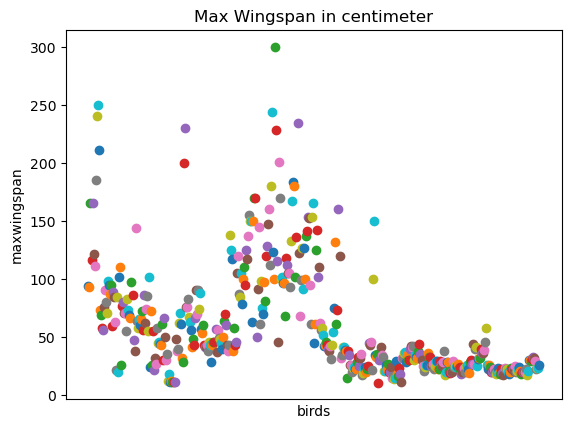

In [6]:
plt.tick_params(labelbottom=False,bottom=False)
plt.xlabel('birds')
plt.ylabel('maxwingspan')
plt.title('Max Wingspan in centimeter')
for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]

    if birds['MaxWingspan'][i] < 500:
        plt.scatter(x, y)
plt.show()

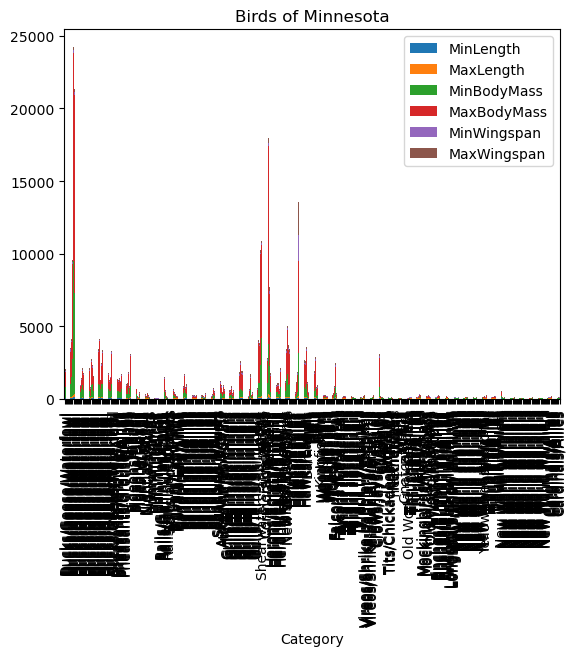

In [7]:
birds.plot(x='Category',kind='bar', title='Birds of Minnesota', stacked=True)
plt.show()

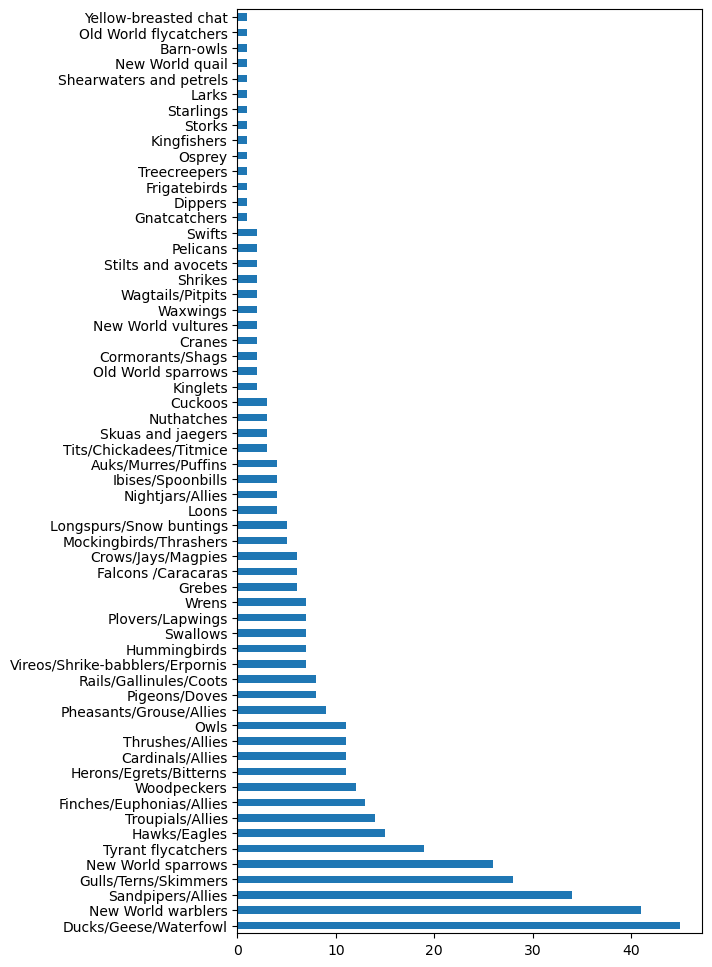

In [8]:
category_count = birds.value_counts(birds['Category'].values, sort=True)
plt.rcParams['figure.figsize'] = [6, 12]
category_count.plot.barh()
plt.show()

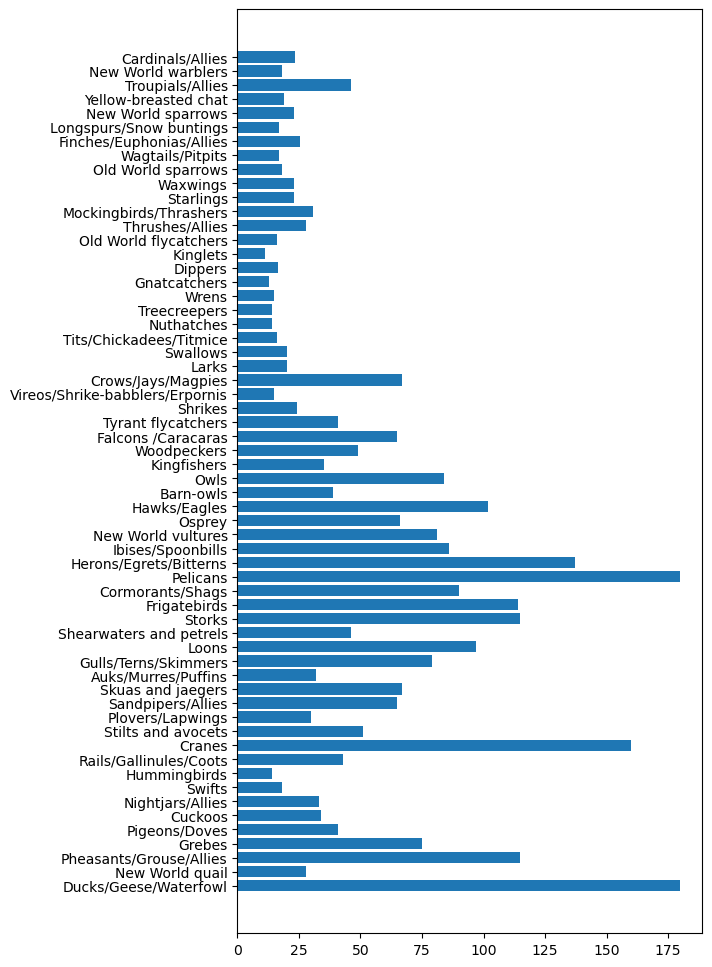

In [9]:
plt.barh(birds['Category'], birds['MaxLength'])
plt.show()

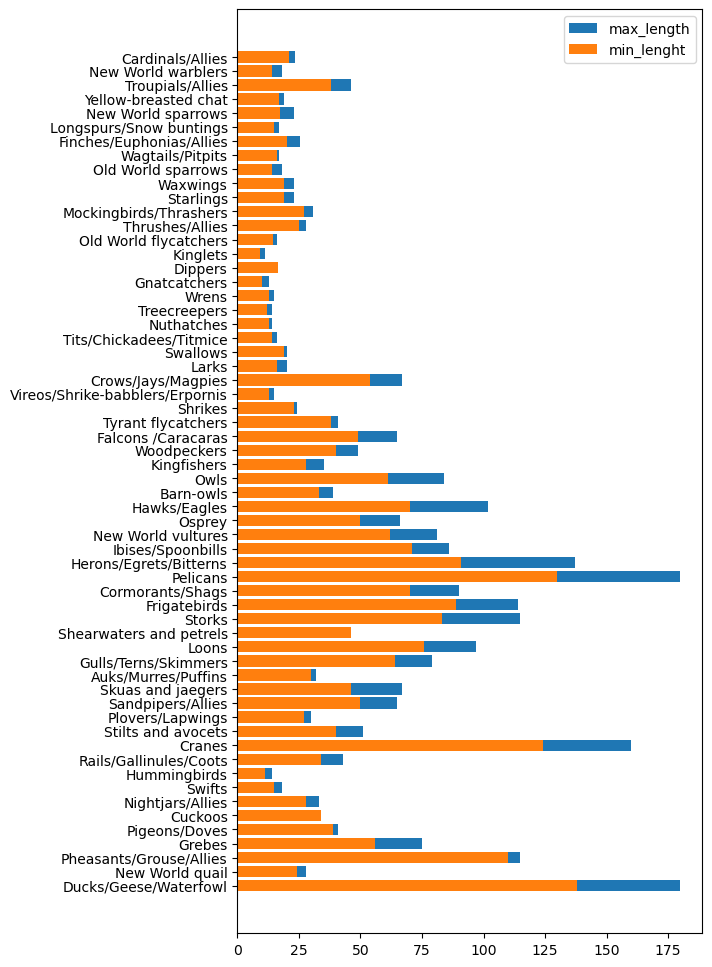

In [10]:
max_length = birds['MaxLength']
min_lenght = birds['MinLength']
category = birds['Category']

plt.barh(category, max_length, label='max_length')
plt.barh(category, min_lenght, label='min_lenght')

plt.legend()
plt.show()

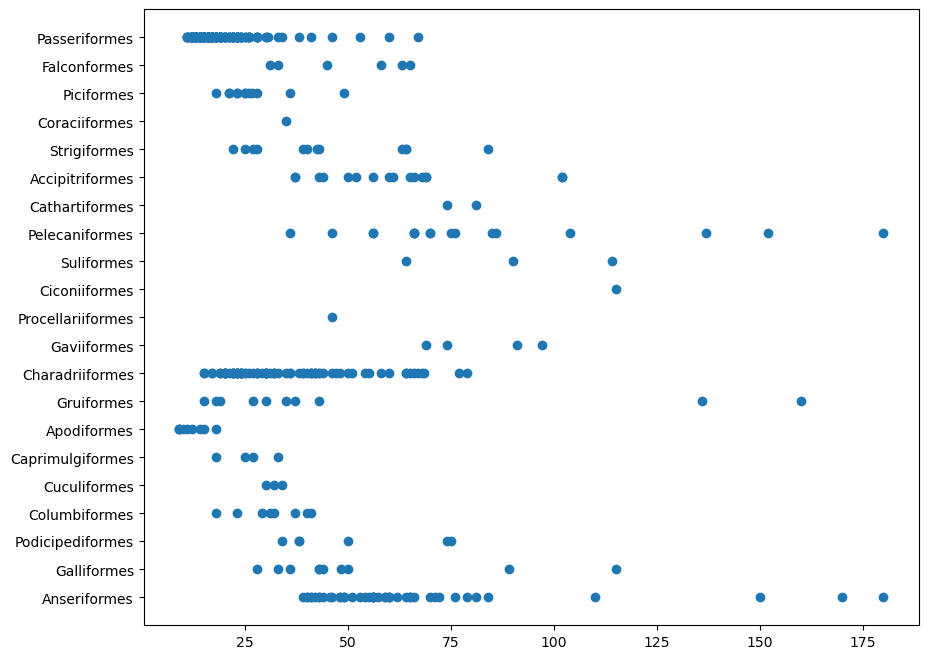

In [14]:
plt.rcParams['figure.figsize'] = [10,8]
plt.scatter(birds['MaxLength'], birds['Order'])

plt.show()

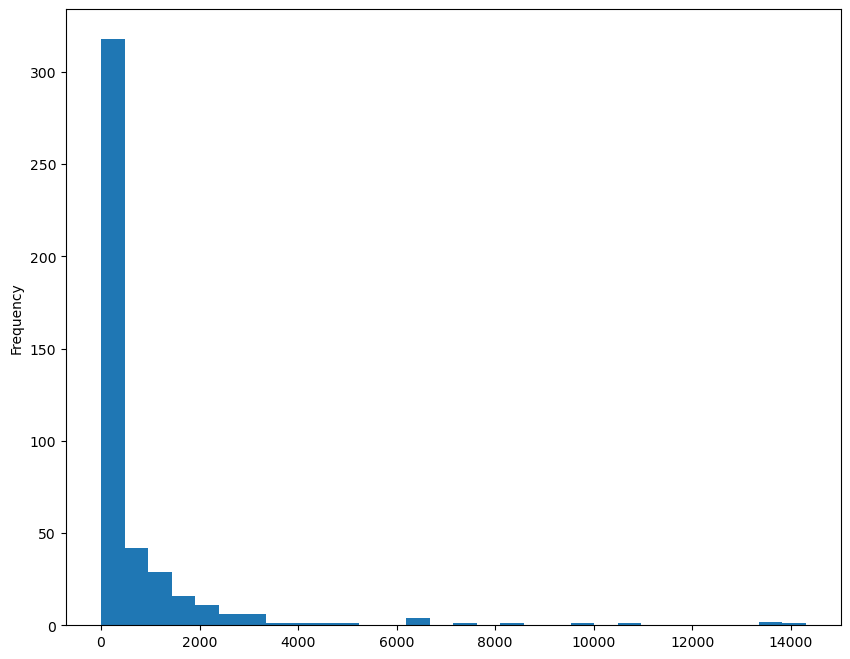

In [16]:
birds['MaxBodyMass'].plot(kind='hist', bins=30, figsize=(10,8))

plt.show()

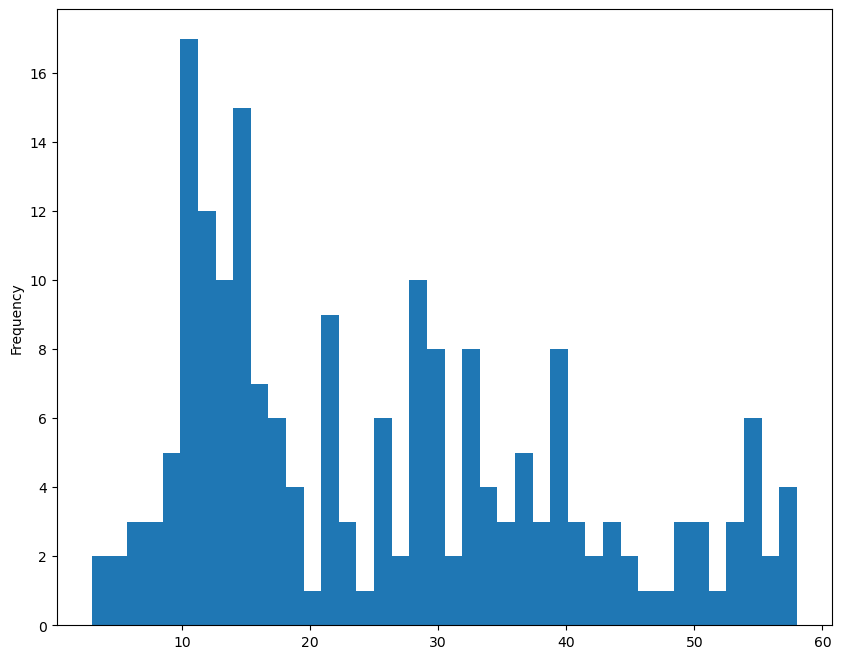

In [20]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]
filteredBirds['MaxBodyMass'].plot(kind='hist', bins=40, figsize=(10,8))

plt.show()

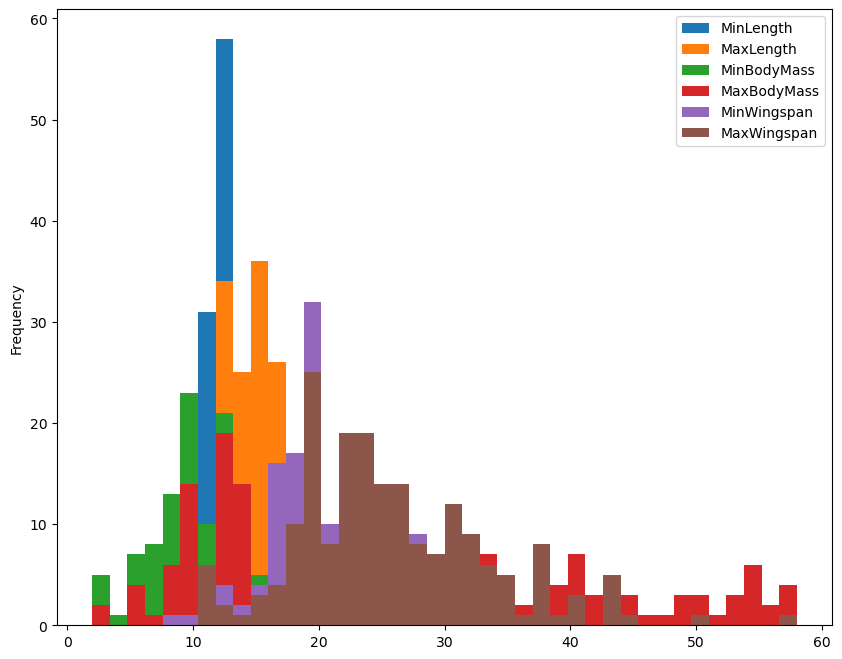

In [23]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]
filteredBirds.plot(kind='hist', bins=40, figsize=(10,8))

plt.show()

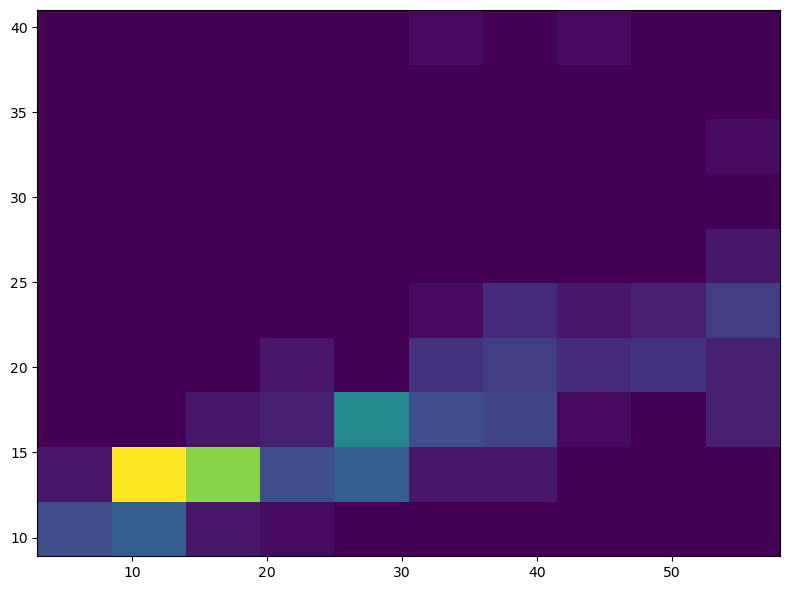

In [30]:
x = filteredBirds['MaxBodyMass']
y = filteredBirds['MaxLength']
plt.rcParams['figure.figsize'] = [8,6]

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

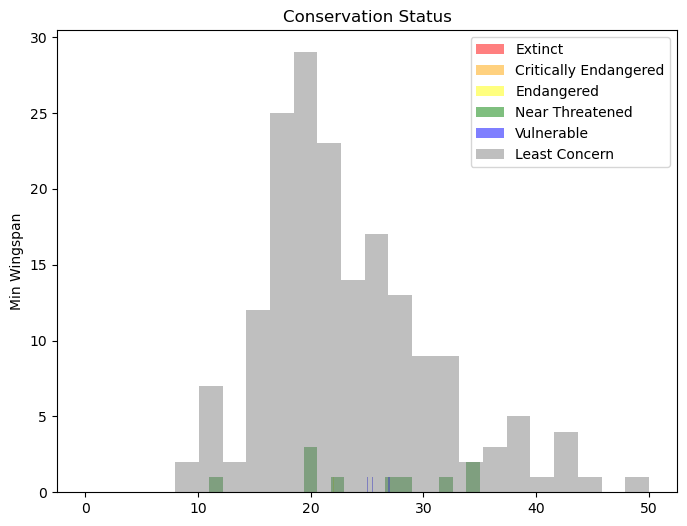

In [32]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Min Wingspan')
plt.legend()
plt.show()

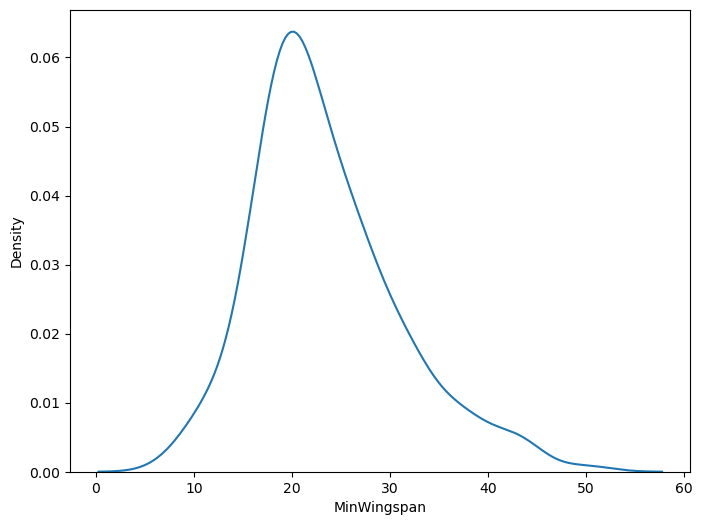

In [33]:
import seaborn as sns

sns.kdeplot(filteredBirds['MinWingspan'])
plt.show()

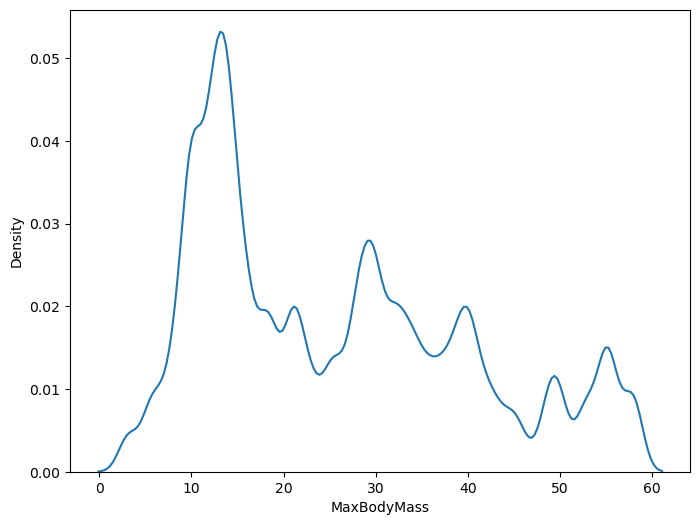

In [37]:
sns.kdeplot(filteredBirds['MaxBodyMass'], bw_adjust=.2)
plt.show()

/home/khalboy10/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/khalboy10/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


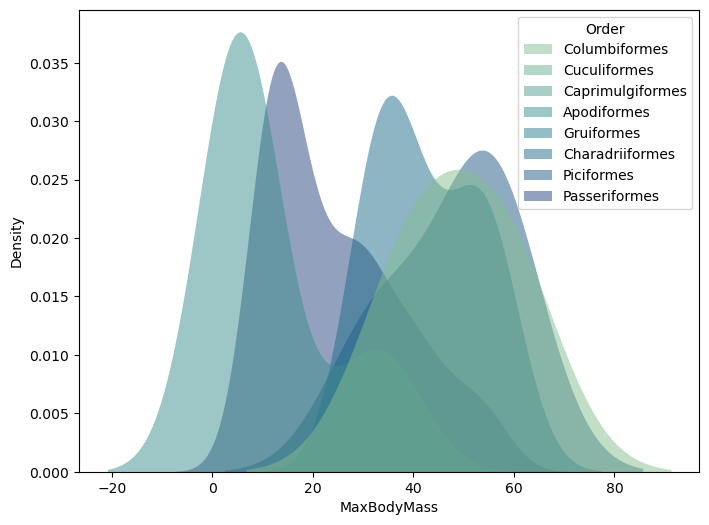

In [39]:
sns.kdeplot(
   data=filteredBirds, x="MaxBodyMass", hue="Order",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

plt.show()

/home/khalboy10/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='MinLength', ylabel='MaxLength'>

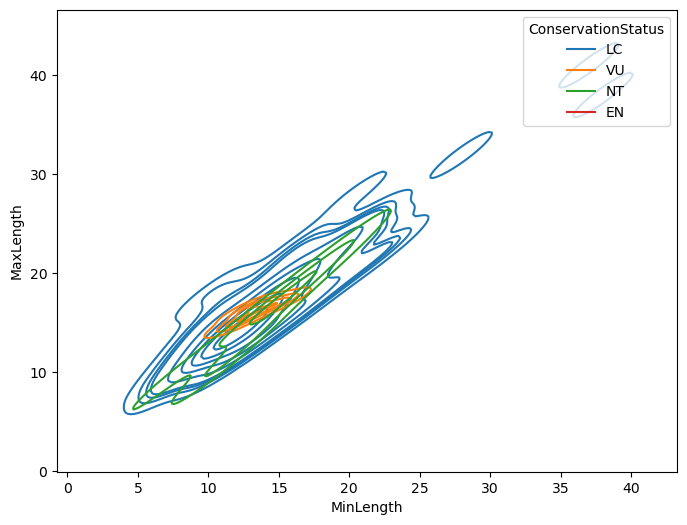

In [40]:
sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")